In [ ]:
!pip install tensorflow opencv-python matplotlib


In [ ]:
import tensorflow as tf
import os
import cv2
import imghdr
import numpy as np
from matplotlib import pyplot as plt
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy


In [ ]:
data_dir = 'data'


In [ ]:
data = tf.keras.utils.image_dataset_from_directory('data', batch_size=8)


Found 107 files belonging to 2 classes.


In [ ]:
data_iterator = data.as_numpy_iterator()


In [ ]:
batch = data_iterator.next()


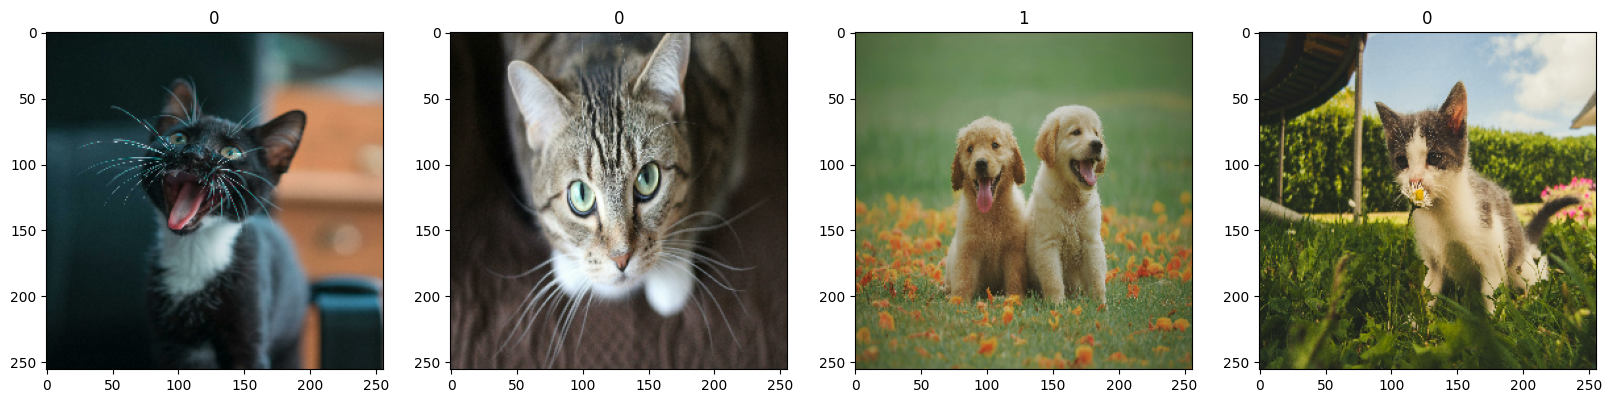

In [ ]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [ ]:
data = data.map(lambda x,y: (x/255, y))


In [ ]:
data.as_numpy_iterator().next()


(array([[[[0.2901961 , 0.37254903, 0.21960784],
          [0.2901961 , 0.37254903, 0.21960784],
          [0.29411766, 0.3764706 , 0.22352941],
          ...,
          [0.28627452, 0.36862746, 0.21568628],
          [0.2784314 , 0.36078432, 0.20784314],
          [0.28161764, 0.36789215, 0.21887255]],
 
         [[0.2901961 , 0.37254903, 0.21960784],
          [0.29362744, 0.37990198, 0.22696078],
          [0.2901961 , 0.37254903, 0.21960784],
          ...,
          [0.28627452, 0.36862746, 0.21568628],
          [0.2784314 , 0.36078432, 0.20784314],
          [0.2784314 , 0.36078432, 0.20784314]],
 
         [[0.2901961 , 0.3764706 , 0.22352941],
          [0.2901961 , 0.3764706 , 0.22352941],
          [0.2867647 , 0.37303922, 0.22009803],
          ...,
          [0.2901961 , 0.37254903, 0.21960784],
          [0.28627452, 0.36862746, 0.21568628],
          [0.2784314 , 0.36078432, 0.20784314]],
 
         ...,
 
         [[0.2735294 , 0.33088234, 0.1985294 ],
          [0.27843

In [ ]:
train_size = 8
val_size = 3
test_size = 2

In [ ]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [ ]:
model = Sequential()


In [ ]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [ ]:
model.summary()


In [ ]:
logdir='logs'


In [ ]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)


In [ ]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])


Epoch 1/20
8/8 [==============================] - 42s 4s/step - loss: 0.8181 - accuracy: 0.4531 - val_loss: 0.6962 - val_accuracy: 0.5417
Epoch 2/20
8/8 [==============================] - 42s 4s/step - loss: 0.7028 - accuracy: 0.5312 - val_loss: 0.6870 - val_accuracy: 0.5833
Epoch 3/20
8/8 [==============================] - 41s 4s/step - loss: 0.6830 - accuracy: 0.5156 - val_loss: 0.6511 - val_accuracy: 0.6667
Epoch 4/20
8/8 [==============================] - 40s 4s/step - loss: 0.6311 - accuracy: 0.7031 - val_loss: 0.5539 - val_accuracy: 0.7500
Epoch 5/20
8/8 [==============================] - 42s 4s/step - loss: 0.5823 - accuracy: 0.6875 - val_loss: 0.4280 - val_accuracy: 0.9167
Epoch 6/20
8/8 [==============================] - 42s 4s/step - loss: 0.4253 - accuracy: 0.8438 - val_loss: 0.3025 - val_accuracy: 0.9167
Epoch 7/20
8/8 [==============================] - 42s 4s/step - loss: 0.3647 - accuracy: 0.8750 - val_loss: 0.2791 - val_accuracy: 0.8333
Epoch 8/20
8/8 [==================

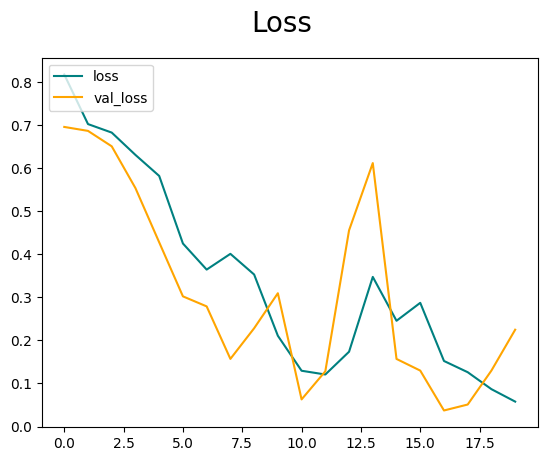

In [ ]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

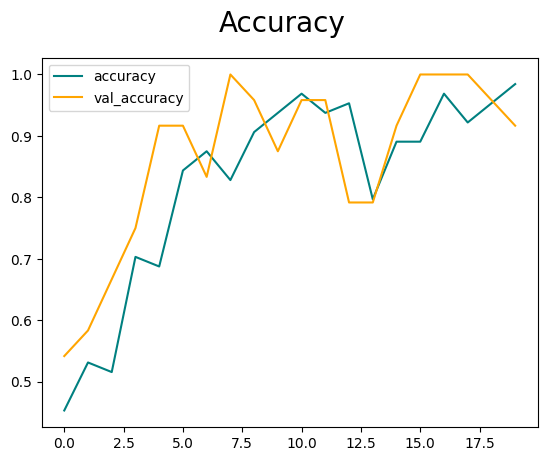

In [ ]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [ ]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [ ]:
for batch in test.as_numpy_iterator():
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 [==============================] - 0s 103ms/step


In [ ]:
print(pre.result(), re.result(), acc.result())

tf.Tensor(1.0, shape=(), dtype=float32) tf.Tensor(1.0, shape=(), dtype=float32) tf.Tensor(1.0, shape=(), dtype=float32)


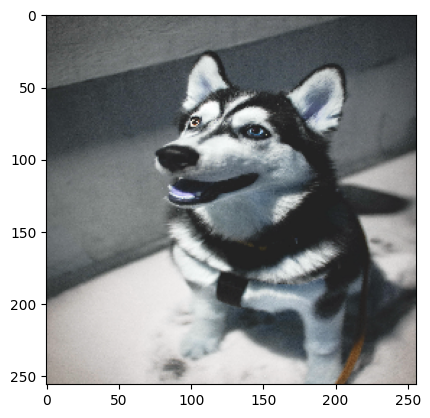

In [ ]:
img = cv2.imread('dogTest.jpg')
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [ ]:
yhat = model.predict(np.expand_dims(resize/255, 0))

if yhat > 0.5:
    print(f'Predicted class is Dog')
else:
    print(f'Predicted class is Cat')
print(yhat)

1/1 [==============================] - 0s 37ms/step
Predicted class is Dog
[[0.9355648]]
